       Profit       State  marketing  Administration      spend
0   192261.83    New York  471784.10       136897.80  165349.20
1   191792.06  California  443898.53       151377.59  162597.70
2   191050.39     Florida  407934.54       101145.55  153441.51
3   182901.99    New York  383199.62       118671.85  144372.41
4   166187.94     Florida  366168.42        91391.77  142107.34
5   156991.12    New York  362861.36        99814.71  131876.90
6   156122.51  California  127716.82       147198.87  134615.46
7   155752.60     Florida  323876.68       145530.06  130298.13
8   152211.77    New York  311613.29       148718.95  120542.52
9   149759.96  California  304981.62       108679.17  123334.88
10  146121.95     Florida  229160.95       110594.11  101913.08
11  144259.40  California  249744.55        91790.61  100671.96
12  141585.52     Florida  249839.44       127320.38   93863.75
13  134307.35  California  252664.93       135495.07   91992.39
14  132602.65     Florida  256512.92    

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

8855.292795527474

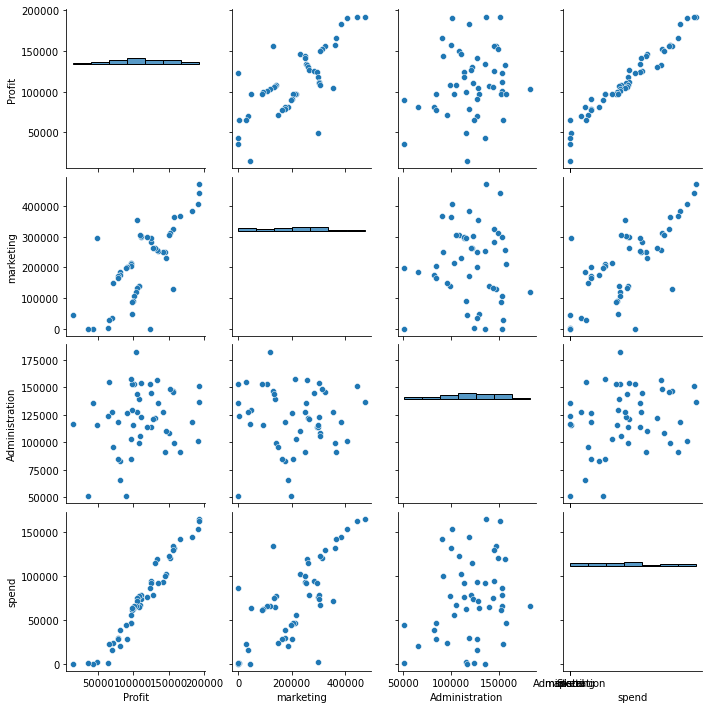

In [1]:
#Lasso & Ridge Regression
#Problem Statement: -	
#An Analytics Company has been tasked by a crucial job of  finding out what factors does affect a startup company and will it be profitable to do so or not. For this, they have collected some historical data and would like to applying supervised predictive learning algorithm such as Lasso Ridge Regression on it and provide brief insights about their data. Predict Profit, given different attributes for various startup companies.
#Answer;-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
company = pd.read_csv(r'C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\lASSORIDGE\50_Startups (1).csv')
# Rearrange the order of the variables
company = company.iloc[:, [4,3,2,1,0]]
company.columns
company.rename(columns={"R&D Spend" : "spend" , "Marketing Spend" : "marketing"},inplace=True)
company.columns
company.isna().sum() # there are no NA value in the dataset
print(company) 
company.dtypes
company.State.replace({"New York": "1", "California": "2", "Florida": "3" }, inplace=True)
# Correlation matrix 
a = company.corr()
a
# EDA
company.describe()
# Sctter plot and histogram between variables
sns.pairplot(company) 
# To overcome the issues, LASSO and RIDGE regression are used
################
###LASSO MODEL###
from sklearn.linear_model import Lasso
help(Lasso)
lasso = Lasso(alpha = 0.13, normalize = True)
lasso.fit(company.iloc[:, 1:], company.Profit)
# Coefficient values for all independent variables#
lasso.coef_
lasso.intercept_
plt.bar(height = pd.Series(lasso.coef_), x = pd.Series(company.columns[1:]))
lasso.alpha
pred_lasso = lasso.predict(company.iloc[:, 1:])
# Adjusted r-square
lasso.score(company.iloc[:, 1:], company.Profit)
# RMSE
np.sqrt(np.mean((pred_lasso - company.Profit)**2))
### RIDGE REGRESSION ###
from sklearn.linear_model import Ridge
help(Ridge)
rm = Ridge(alpha = 0.4, normalize = True)
rm.fit(company.iloc[:, 1:], company.Profit)
# Coefficients values for all the independent vairbales
rm.coef_
rm.intercept_
plt.bar(height = pd.Series(rm.coef_), x = pd.Series(company.columns[1:]))
rm.alpha
pred_rm = rm.predict(company.iloc[:, 1:])
# Adjusted r-square
rm.score(company.iloc[:, 1:], company.Profit)
# RMSE
np.sqrt(np.mean((pred_rm - company.Profit)**2))
### ELASTIC NET REGRESSION ###
from sklearn.linear_model import ElasticNet 
help(ElasticNet)
enet = ElasticNet(alpha = 0.4)
enet.fit(company.iloc[:, 1:], company.Profit) 
# Coefficients values for all the independent vairbales
enet.coef_
enet.intercept_
plt.bar(height = pd.Series(enet.coef_), x = pd.Series(company.columns[1:]))
enet.alpha
pred_enet = enet.predict(company.iloc[:, 1:])
# Adjusted r-square
enet.score(company.iloc[:, 1:], company.Profit)
# RMSE
np.sqrt(np.mean((pred_enet - company.Profit)**2))
####################
# Lasso Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}
lasso_reg = GridSearchCV(lasso, parameters, scoring = 'r2', cv = 5)
lasso_reg.fit(company.iloc[:, 1:], company.Profit)
lasso_reg.best_params_
lasso_reg.best_score_
lasso_pred = lasso_reg.predict(company.iloc[:, 1:])
# Adjusted r-square#
lasso_reg.score(company.iloc[:, 1:], company.Profit)
# RMSE
np.sqrt(np.mean((lasso_pred - company.Profit)**2))
# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}
ridge_reg = GridSearchCV(ridge, parameters, scoring = 'r2', cv = 5)
ridge_reg.fit(company.iloc[:, 1:], company.Profit)
ridge_reg.best_params_
ridge_reg.best_score_
ridge_pred = ridge_reg.predict(company.iloc[:, 1:])
# Adjusted r-square#
ridge_reg.score(company.iloc[:, 1:], company.Profit)
# RMSE
np.sqrt(np.mean((ridge_pred - company.Profit)**2))
# ElasticNet Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}
enet_reg = GridSearchCV(enet, parameters, scoring = 'neg_mean_squared_error', cv = 5)
enet_reg.fit(company.iloc[:, 1:], company.Profit)
enet_reg.best_params_
enet_reg.best_score_
enet_pred = enet_reg.predict(company.iloc[:, 1:])
# Adjusted r-square
enet_reg.score(company.iloc[:, 1:], company.Profit)
# RMSE
np.sqrt(np.mean((enet_pred - company.Profit)**2))

         x  price  speed    hd  ram  screen   cd multi premium  ads  trend
0        1   1499     25    80    4      14   no    no     yes   94      1
1        2   1795     33    85    2      14   no    no     yes   94      1
2        3   1595     25   170    4      15   no    no     yes   94      1
3        4   1849     25   170    8      14   no    no      no   94      1
4        5   3295     33   340   16      14   no    no     yes   94      1
...    ...    ...    ...   ...  ...     ...  ...   ...     ...  ...    ...
6254  6255   1690    100   528    8      15   no    no     yes   39     35
6255  6256   2223     66   850   16      15  yes   yes     yes   39     35
6256  6257   2654    100  1200   24      15  yes    no     yes   39     35
6257  6258   2195    100   850   16      15  yes    no     yes   39     35
6258  6259   2490    100   850   16      17  yes    no     yes   39     35

[6259 rows x 11 columns]
         x  price  speed    hd  ram  screen   cd multi premium  ads  trend

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

311.5026017856945

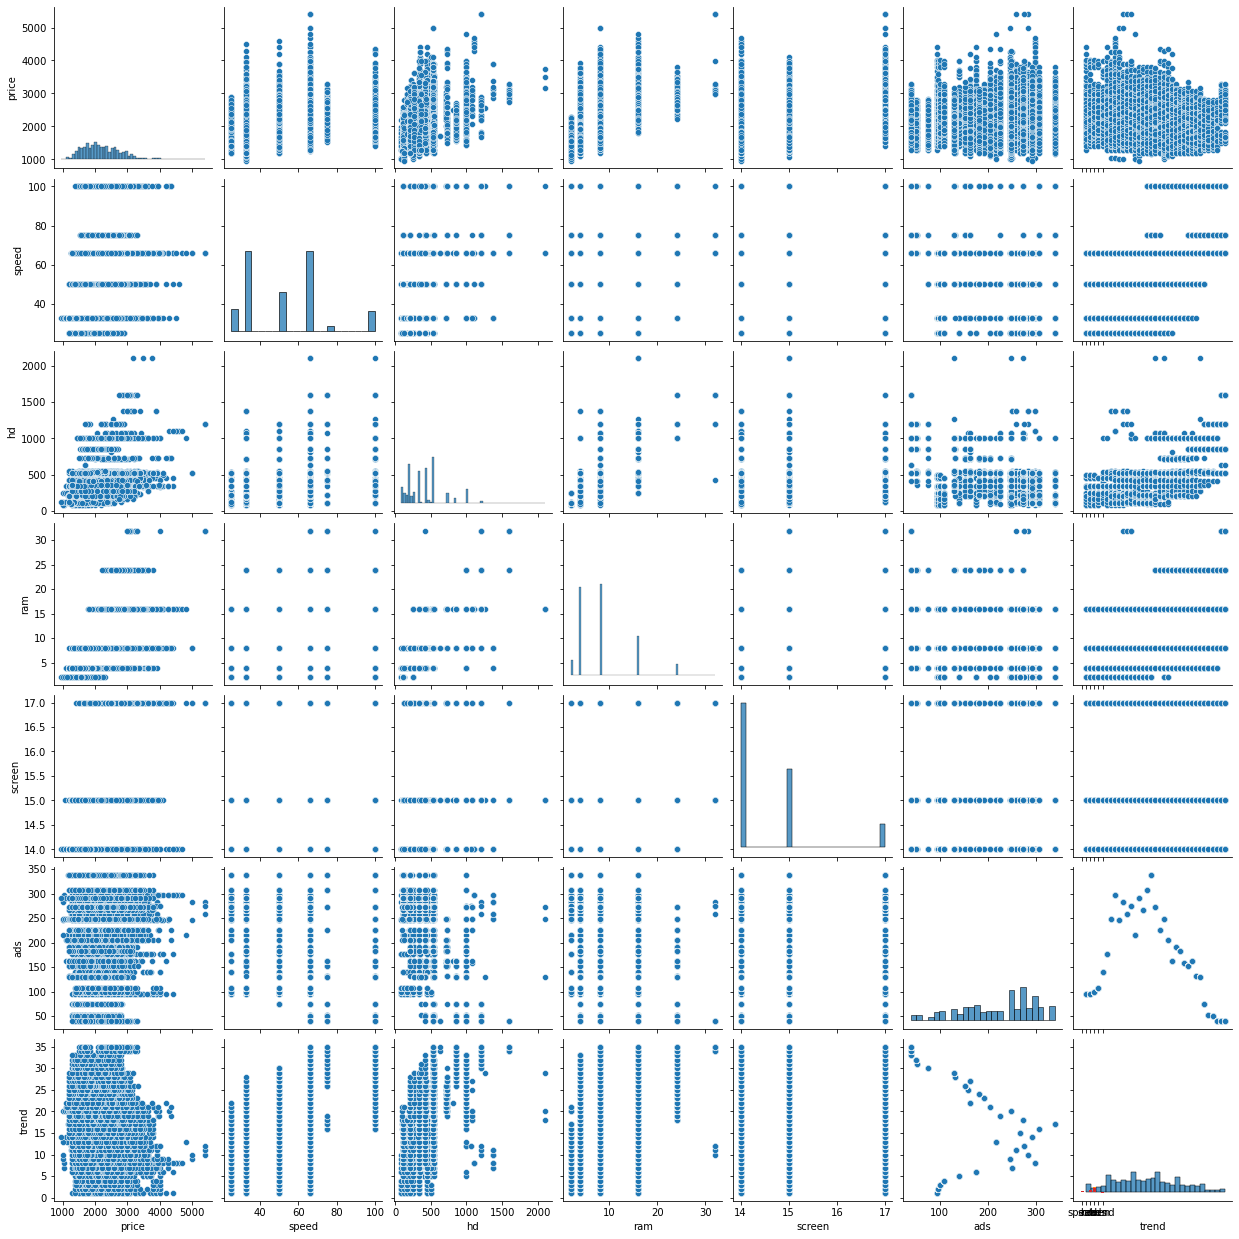

In [2]:
#Problem Statement: -
#Officeworks, is a leading retail store in Australia, with numerous outlets around the country, the manager would like to improve their customer experience by providing them online predictive prices about their gadgets/ Laptops if they wants to sell them. To improve this experience the manager would like us to build a model which is sustainable and accurate enough, to get the objective achieved. Apply Lasso Ridge Regression model on the dataset and predict Price, given other attributes and tabulate R squared ,RMSE and correlation values.
#Answer ;- 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
computer = pd.read_csv(r'C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\lASSORIDGE\Computer_Data (1).csv')
computer.describe()
computer.columns
computer.rename(columns={"Unnamed: 0" : "x"},inplace=True)
computer.columns
computer.isna().sum() # there are no NA value in the dataset
print(computer) 
computer.dtypes
computer.describe()
computer.columns
computer.rename(columns={"Unnamed: 0" : "x"},inplace=True)
computer.columns
computer.isna().sum() # there are no NA value in the dataset
print(computer) 
computer.dtypes
#removing unwanted column from the dataset
computer.drop('cd', axis=1, inplace=True)
computer.drop('multi', axis=1, inplace=True)
computer.drop('premium', axis=1, inplace=True)
computer.drop('x', axis=1, inplace=True)
computer.columns
# Correlation matrix 
a = computer.corr()
a
computer.describe()
# Sctter plot and histogram between variables
sns.pairplot(computer)
# Preparing the model on train data 
model_train = smf.ols("price ~ trend + speed + ram + screen + hd + ads", data = computer).fit()
model_train.summary()
# Prediction
pred = model_train.predict(computer)
# Error
resid  = pred - computer.price
# RMSE value for data 
rmse = np.sqrt(np.mean(resid * resid))
rmse
# To overcome the issues, LASSO and RIDGE regression are used
################
###LASSO MODEL###
from sklearn.linear_model import Lasso
help(Lasso)
lasso = Lasso(alpha = 0.13, normalize = True)
lasso.fit(computer.iloc[:, 1:], computer.price)
# Coefficient values for all independent variables#
lasso.coef_
lasso.intercept_
plt.bar(height = pd.Series(lasso.coef_), x = pd.Series(computer.columns[1:]))
lasso.alpha
pred_lasso = lasso.predict(computer.iloc[:, 1:])
# Adjusted r-square
lasso.score(computer.iloc[:, 1:], computer.price)
# RMSE
np.sqrt(np.mean((pred_lasso - computer.price)**2))
### RIDGE REGRESSION ###
from sklearn.linear_model import Ridge
help(Ridge)
rm = Ridge(alpha = 0.4, normalize = True)
rm.fit(computer.iloc[:, 1:], computer.price)
# Coefficients values for all the independent vairbales
rm.coef_
rm.intercept_
plt.bar(height = pd.Series(rm.coef_), x = pd.Series(computer.columns[1:]))
rm.alpha
pred_rm = rm.predict(computer.iloc[:, 1:])
# Adjusted r-square
rm.score(computer.iloc[:, 1:], computer.price)
# RMSE
np.sqrt(np.mean((pred_rm - computer.price)**2))
### ELASTIC NET REGRESSION ###
from sklearn.linear_model import ElasticNet 
help(ElasticNet)
enet = ElasticNet(alpha = 0.4)
enet.fit(computer.iloc[:, 1:], computer.price) 
# Coefficients values for all the independent vairbales
enet.coef_
enet.intercept_
plt.bar(height = pd.Series(enet.coef_), x = pd.Series(computer.columns[1:]))
enet.alpha
pred_enet = enet.predict(computer.iloc[:, 1:])
# Adjusted r-square
enet.score(computer.iloc[:, 1:], computer.price)
# RMSE
np.sqrt(np.mean((pred_enet - computer.price)**2))
####################
# Lasso Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}
lasso_reg = GridSearchCV(lasso, parameters, scoring = 'r2', cv = 5)
lasso_reg.fit(computer.iloc[:, 1:], computer.price)
lasso_reg.best_params_
lasso_reg.best_score_
lasso_pred = lasso_reg.predict(computer.iloc[:, 1:])
# Adjusted r-square#
lasso_reg.score(computer.iloc[:, 1:], computer.price)
# RMSE
np.sqrt(np.mean((lasso_pred - computer.price)**2))
# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}
ridge_reg = GridSearchCV(ridge, parameters, scoring = 'r2', cv = 5)
ridge_reg.fit(computer.iloc[:, 1:], computer.price)
ridge_reg.best_params_
ridge_reg.best_score_
ridge_pred = ridge_reg.predict(computer.iloc[:, 1:])
# Adjusted r-square#
ridge_reg.score(computer.iloc[:, 1:], computer.price)
# RMSE
np.sqrt(np.mean((ridge_pred - computer.price)**2))
# ElasticNet Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}
enet_reg = GridSearchCV(enet, parameters, scoring = 'neg_mean_squared_error', cv = 5)
enet_reg.fit(computer.iloc[:, 1:], computer.price)
enet_reg.best_params_
enet_reg.best_score_
enet_pred = enet_reg.predict(computer.iloc[:, 1:])
# Adjusted r-square
enet_reg.score(computer.iloc[:, 1:], computer.price)
# RMSE
np.sqrt(np.mean((enet_pred - computer.price)**2))

In [4]:
#Problem Statement: -
#An online car sales platform would like to improve its customer base and their experience by providing them an easy way  to buy and sell cars. For this, they would like to have an automated model which can predict the price of the car if user inputs the required factors. Help the business achieve the objective by applying Lasso and Ridge regression model on it.
#Please use the below columns for the analysis purpose.
#Price, Age_08_04, KM,  HP,   cc,  Doors , Gears, Quarterly_Tax, Weight
#Answer;-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
toyota = pd.read_csv(r'C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\lASSORIDGE\ToyotaCorolla (1).csv')
toyota.describe()
toyota.columns
toyota.isna().sum() # there are no NA value in the dataset
print(toyota) 
toyota.dtypes
#removing unwanted column from the dataset
toyota.drop('Id', axis=1, inplace=True)
toyota.drop('Model', axis=1, inplace=True)
toyota.drop('Mfg_Month', axis=1, inplace=True)
toyota.drop('Mfg_Year', axis=1, inplace=True)
toyota.drop('Fuel_Type', axis=1, inplace=True)
toyota.drop('Met_Color', axis=1, inplace=True)
toyota.drop('Color', axis=1, inplace=True)
toyota.drop('Automatic', axis=1, inplace=True)
toyota.drop('Cylinders', axis=1, inplace=True)
toyota.drop('Mfr_Guarantee', axis=1, inplace=True)
toyota.drop('BOVAG_Guarantee', axis=1, inplace=True)
toyota.drop('Guarantee_Period', axis=1, inplace=True)
toyota.drop('ABS', axis=1, inplace=True)
toyota.drop('Airbag_1', axis=1, inplace=True)
toyota.drop('Airbag_2', axis=1, inplace=True)
toyota.drop('Airco', axis=1, inplace=True)
toyota.drop('Automatic_airco', axis=1, inplace=True)
toyota.drop('Boardcomputer', axis=1, inplace=True)
toyota.drop('CD_Player', axis=1, inplace=True)
toyota.drop('Central_Lock', axis=1, inplace=True)
toyota.drop('Powered_Windows', axis=1, inplace=True)
toyota.drop('Power_Steering', axis=1, inplace=True)
toyota.drop('Radio', axis=1, inplace=True)
toyota.drop('Mistlamps', axis=1, inplace=True)
toyota.drop('Sport_Model', axis=1, inplace=True)
toyota.drop('Backseat_Divider', axis=1, inplace=True)
toyota.drop('Metallic_Rim', axis=1, inplace=True)
toyota.drop('Radio_cassette', axis=1, inplace=True)
toyota.drop('Tow_Bar', axis=1, inplace=True)
toyota.columns
# Correlation matrix 
a = toyota.corr()
a
# Sctter plot and histogram between variables
sns.pairplot(toyota) 
# To overcome the issues, LASSO and RIDGE regression are used
################
###LASSO MODEL###
from sklearn.linear_model import Lasso
help(Lasso)
lasso = Lasso(alpha = 0.13, normalize = True)
lasso.fit(toyota.iloc[:, 1:], toyota.Price)
# Coefficient values for all independent variables#
lasso.coef_
lasso.intercept_
plt.bar(height = pd.Series(lasso.coef_), x = pd.Series(toyota.columns[1:]))
lasso.alpha
pred_lasso = lasso.predict(toyota.iloc[:, 1:])
# Adjusted r-square
lasso.score(toyota.iloc[:, 1:], toyota.Price)
# RMSE
np.sqrt(np.mean((pred_lasso - toyota.Price)**2))
### RIDGE REGRESSION ###
from sklearn.linear_model import Ridge
help(Ridge)
rm = Ridge(alpha = 0.4, normalize = True)
rm.fit(toyota.iloc[:, 1:], toyota.Price)
# Coefficients values for all the independent vairbales
rm.coef_
rm.intercept_
plt.bar(height = pd.Series(rm.coef_), x = pd.Series(toyota.columns[1:]))
rm.alpha
pred_rm = rm.predict(toyota.iloc[:, 1:])
# Adjusted r-square
rm.score(toyota.iloc[:, 1:], toyota.Price)
# RMSE
np.sqrt(np.mean((pred_rm - toyota.Price)**2))
### ELASTIC NET REGRESSION ###
from sklearn.linear_model import ElasticNet 
help(ElasticNet)
enet = ElasticNet(alpha = 0.4)
enet.fit(toyota.iloc[:, 1:], toyota.Price) 
# Coefficients values for all the independent vairbales
enet.coef_
enet.intercept_
plt.bar(height = pd.Series(enet.coef_), x = pd.Series(toyota.columns[1:]))
enet.alpha
pred_enet = enet.predict(toyota.iloc[:, 1:])
# Adjusted r-square
enet.score(toyota.iloc[:, 1:], toyota.Price)
# RMSE
np.sqrt(np.mean((pred_enet - toyota.Price)**2))
####################
# Lasso Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}
lasso_reg = GridSearchCV(lasso, parameters, scoring = 'r2', cv = 5)
lasso_reg.fit(toyota.iloc[:, 1:], toyota.Price)
lasso_reg.best_params_
lasso_reg.best_score_
lasso_pred = lasso_reg.predict(toyota.iloc[:, 1:])
# Adjusted r-square#
lasso_reg.score(toyota.iloc[:, 1:], toyota.Price)
# RMSE
np.sqrt(np.mean((lasso_pred - toyota.Price)**2))
# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}
ridge_reg = GridSearchCV(ridge, parameters, scoring = 'r2', cv = 5)
ridge_reg.fit(toyota.iloc[:, 1:], toyota.Price)
ridge_reg.best_params_
ridge_reg.best_score_
ridge_pred = ridge_reg.predict(toyota.iloc[:, 1:])
# Adjusted r-square#
ridge_reg.score(toyota.iloc[:, 1:], toyota.Price)
# RMSE
np.sqrt(np.mean((ridge_pred - toyota.Price)**2))
# ElasticNet Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}
enet_reg = GridSearchCV(enet, parameters, scoring = 'neg_mean_squared_error', cv = 5)
enet_reg.fit(toyota.iloc[:, 1:], toyota.Price)
enet_reg.best_params_
enet_reg.best_score_
enet_pred = enet_reg.predict(toyota.iloc[:, 1:])
# Adjusted r-square
enet_reg.score(toyota.iloc[:, 1:], toyota.Price)
# RMSE
np.sqrt(np.mean((enet_pred - toyota.Price)**2))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 679: invalid start byte

      Year  expectancy  Mortality  infant  Alcohol  expenditure  Hepatitis  \
0     2015        65.0      263.0      62     0.01    71.279624       65.0   
1     2014        59.9      271.0      64     0.01    73.523582       62.0   
2     2013        59.9      268.0      66     0.01    73.219243       64.0   
3     2012        59.5      272.0      69     0.01    78.184215       67.0   
4     2011        59.2      275.0      71     0.01     7.097109       68.0   
...    ...         ...        ...     ...      ...          ...        ...   
2933  2004        44.3      723.0      27     4.36     0.000000       68.0   
2934  2003        44.5      715.0      26     4.06     0.000000        7.0   
2935  2002        44.8       73.0      25     4.43     0.000000       73.0   
2936  2001        45.3      686.0      25     1.72     0.000000       76.0   
2937  2000        46.0      665.0      24     1.68     0.000000       79.0   

      Measles   BMI  under  Polio  Total  Diphtheria  AIDS     

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

f

C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.177e+04, tolerance: 4.996e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.164e+04, tolerance: 5.008e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\tarun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.288e-01, toleranc

ValueError: y_true and y_pred have different number of output (1!=20)

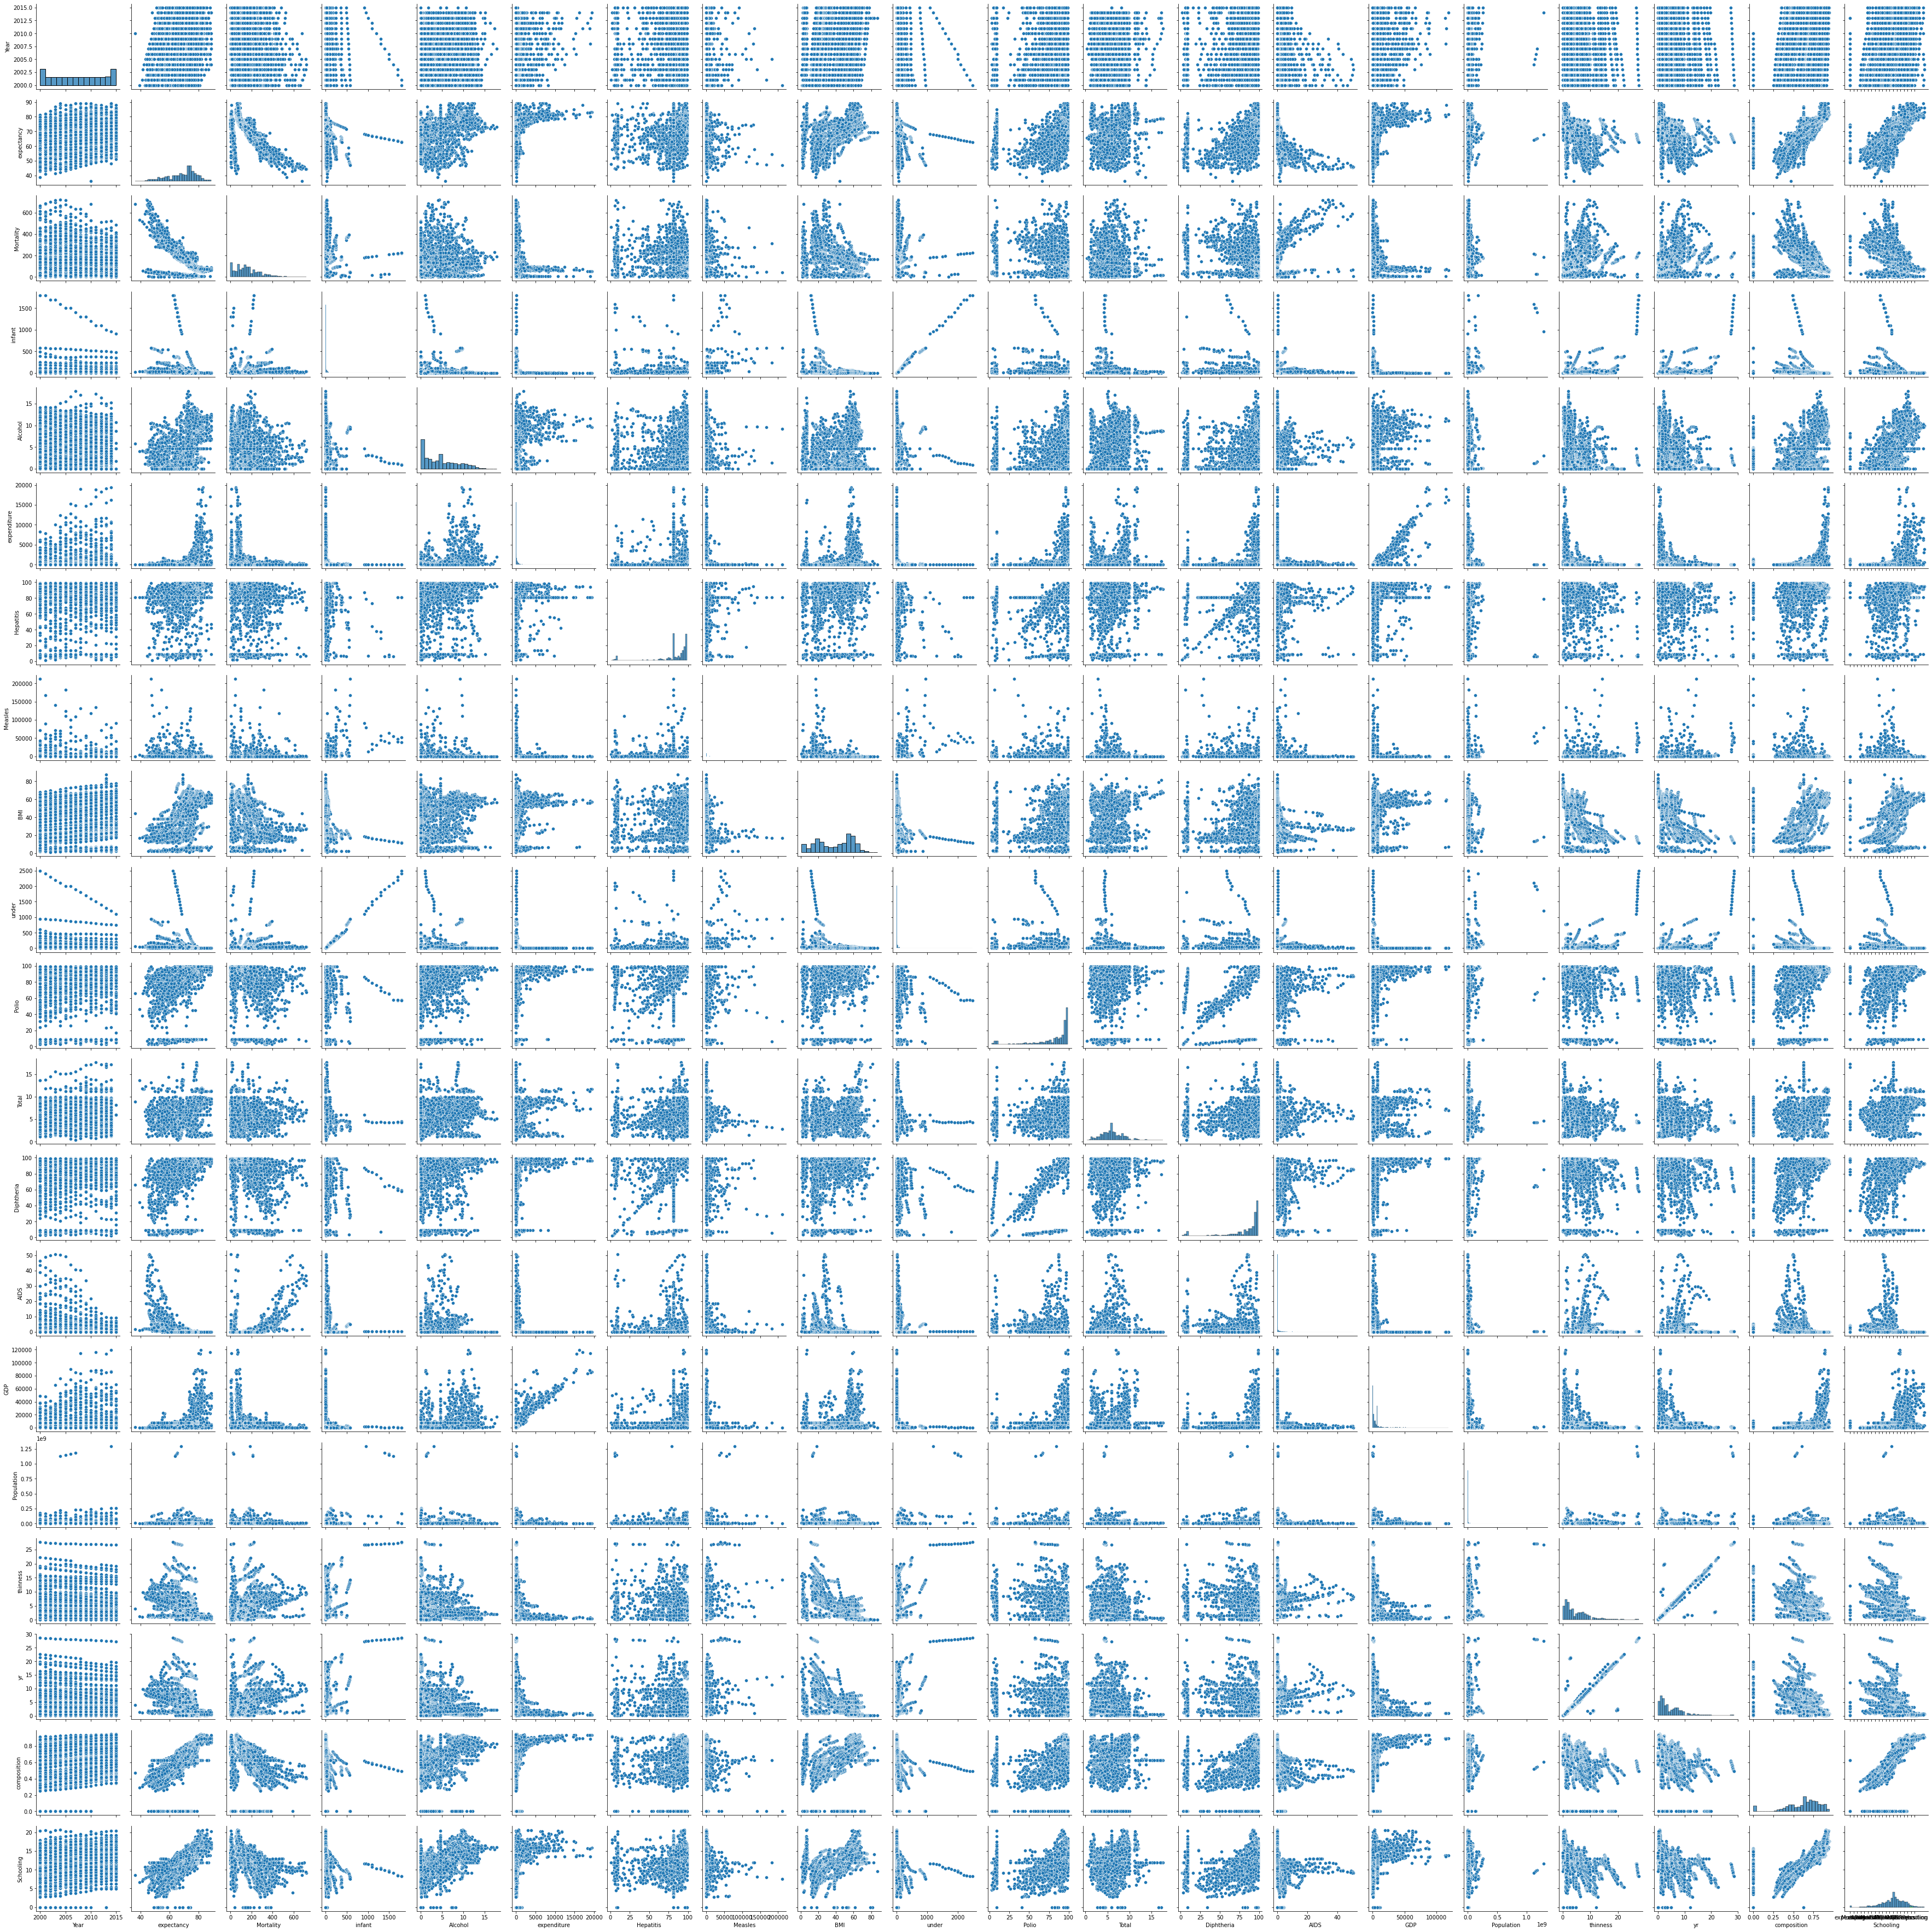

In [5]:
#Problem Statement: -
#Data of various countries and the factors affecting their Life expectancy has been recorded over past few decades. An analytics firm would like to know how it varies country wise and what other factors are influential in model building. Use your skills to analyze the data and build a Lasso and Ridge Regression model and also summarize the output of the model.
#Snapshot the dataset is given below: -
#Answer;-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
df = pd.read_csv(r'C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\lASSORIDGE\Life_expectencey_LR.csv')
df.columns
df.drop('Country', axis=1, inplace=True)
df.drop('Status', axis=1, inplace=True)
df.rename(columns={"Life_expectancy" : "expectancy" , "Adult_Mortality" : "Mortality", "infant_deaths": "infant", "percentage_expenditure": "expenditure", "Hepatitis_B": "Hepatitis", "under_five_deaths": "under", "Total_expenditure": "Total", "HIV_AIDS":"AIDS", "thinness_yr": "yr", "Income_composition": "composition"},inplace=True)
df.columns
print(df) 
df.dtypes
df.isna().sum() 

# Imputating the missing values           
mean_value = df.expectancy.mean()
mean_value
df.expectancy = df.expectancy.fillna(mean_value)
df.expectancy.isna().sum()

mean_value = df.Mortality.mean()
mean_value
df.Mortality = df.Mortality.fillna(mean_value)
df.Mortality.isna().sum()

mean_value = df.Alcohol.mean()
mean_value
df.Alcohol = df.Alcohol.fillna(mean_value)
df.Alcohol.isna().sum()

mean_value = df.Hepatitis.mean()
mean_value
df.Hepatitis = df.Hepatitis.fillna(mean_value)
df.Hepatitis.isna().sum()

mean_value = df.BMI.mean()
mean_value
df.BMI = df.BMI.fillna(mean_value)
df.BMI.isna().sum()

mean_value = df.Polio.mean()
mean_value
df.Polio = df.Polio.fillna(mean_value)
df.Polio.isna().sum()

mean_value = df.Total.mean()
mean_value
df.Total = df.Total.fillna(mean_value)
df.Total.isna().sum()

mean_value = df.Diphtheria.mean()
mean_value
df.Diphtheria = df.Diphtheria.fillna(mean_value)
df.Diphtheria.isna().sum()

mean_value = df.GDP.mean()
mean_value
df.GDP = df.GDP.fillna(mean_value)
df.GDP.isna().sum()

mean_value = df.Population.mean()
mean_value
df.Population = df.Population.fillna(mean_value)
df.Population.isna().sum()

mean_value = df.thinness.mean()
mean_value
df.thinness = df.thinness.fillna(mean_value)
df.thinness.isna().sum()

mean_value = df.yr.mean()
mean_value
df.yr = df.yr.fillna(mean_value)
df.yr.isna().sum()

mean_value = df.composition.mean()
mean_value
df.composition = df.composition.fillna(mean_value)
df.composition.isna().sum()

mean_value = df.Schooling.mean()
mean_value
df.Schooling = df.Schooling.fillna(mean_value)
df.Schooling.isna().sum()

df.isna().sum() # there are no more NA value in the dataset 

# Correlation matrix 
a = df.corr()
a
# Sctter plot and histogram between variables
sns.pairplot(df) 
# To overcome the issues, LASSO and RIDGE regression are used
################
###LASSO MODEL###
from sklearn.linear_model import Lasso
help(Lasso)
lasso = Lasso(alpha = 0.13, normalize = True)
lasso.fit(df.iloc[:, 1:], df.expectancy)
# Coefficient values for all independent variables#
lasso.coef_
lasso.intercept_
plt.bar(height = pd.Series(lasso.coef_), x = pd.Series(df.columns[1:]))
lasso.alpha
pred_lasso = lasso.predict(df.iloc[:, 1:])
# Adjusted r-square
lasso.score(df.iloc[:, 1:], df.expectancy)
# RMSE
np.sqrt(np.mean((pred_lasso - df.expectancy)**2))
### RIDGE REGRESSION ###
from sklearn.linear_model import Ridge
help(Ridge)
rm = Ridge(alpha = 0.4, normalize = True)
rm.fit(df.iloc[:, 1:], df.expectancy)
# Coefficients values for all the independent vairbales
rm.coef_
rm.intercept_
plt.bar(height = pd.Series(rm.coef_), x = pd.Series(df.columns[1:]))
rm.alpha
pred_rm = rm.predict(df.iloc[:, 1:])
# Adjusted r-square
rm.score(df.iloc[:, 1:], df.expectancy)
# RMSE
np.sqrt(np.mean((pred_rm - df.expectancy)**2))
### ELASTIC NET REGRESSION ###
from sklearn.linear_model import ElasticNet 
help(ElasticNet)
enet = ElasticNet(alpha = 0.4)
enet.fit(df.iloc[:, 1:], df.expectancy) 
# Coefficients values for all the independent vairbales
enet.coef_
enet.intercept_
plt.bar(height = pd.Series(enet.coef_), x = pd.Series(df.columns[1:]))
enet.alpha
pred_enet = enet.predict(df.iloc[:, 1:])
# Adjusted r-square
enet.score(df.iloc[:, 1:], df.expectancy)
# RMSE
np.sqrt(np.mean((pred_enet - df.expectancy)**2))
####################
# Lasso Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}
lasso_reg = GridSearchCV(lasso, parameters, scoring = 'r2', cv = 5)
lasso_reg.fit(df.iloc[:, 1:], df)
lasso_reg.best_params_
lasso_reg.best_score_
lasso_pred = lasso_reg.predict(df.iloc[:, 1:])
# Adjusted r-square#
lasso_reg.score(df.iloc[:, 1:], df.expectancy)
# RMSE
np.sqrt(np.mean((lasso_pred - df.expectancy)**2))
# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}
ridge_reg = GridSearchCV(ridge, parameters, scoring = 'r2', cv = 5)
ridge_reg.fit(df.iloc[:, 1:], df.expectancy)
ridge_reg.best_params_
ridge_reg.best_score_
ridge_pred = ridge_reg.predict(df.iloc[:, 1:])
# Adjusted r-square#
ridge_reg.score(df.iloc[:, 1:], df.expectancy)
# RMSE
np.sqrt(np.mean((ridge_pred - df.expectancy)**2))
# ElasticNet Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}
enet_reg = GridSearchCV(enet, parameters, scoring = 'neg_mean_squared_error', cv = 5)
enet_reg.fit(df.iloc[:, 1:], df.expectancy)
enet_reg.best_params_
enet_reg.best_score_
enet_pred = enet_reg.predict(df.iloc[:, 1:])
# Adjusted r-square
enet_reg.score(df.iloc[:, 1:], df.expectancy)
# RMSE
np.sqrt(np.mean((enet_pred - df.expectancy)**2))